In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('aug_train.csv')

### 1. Shape of dataset

In [4]:
df.shape

(19158, 14)

In [5]:
#we can see that dataset has 19158 rows and 14 columns(features)

### 2. Datatypes of columns

In [6]:
df.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

### 3. Display a few rows

In [7]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


### 4. Plot Histogram of Numeric features

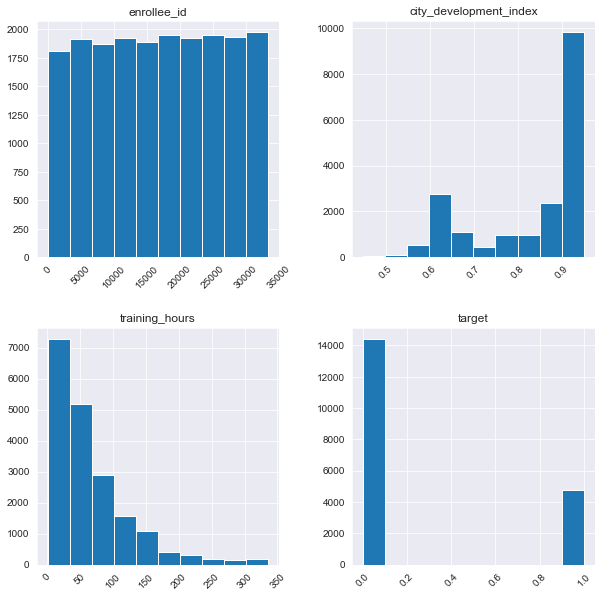

In [8]:
df.hist(figsize=(10,10),xrot=45)
plt.show()

As expected, we see that target, our dependent feature, is actually an indicator variable with only two possible values;
0 and 1. enrollee_id is an ID column, meaning that each value occurs only once hence the equal distribution 
among all bins.

### 5.Display the Numeric features summary statistics

In [10]:
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### 6. Summary statistics of categorical feature

In [11]:
df.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


### 7.Plot categorical distribution

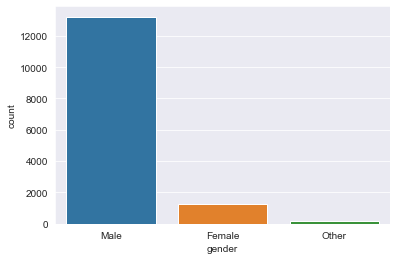

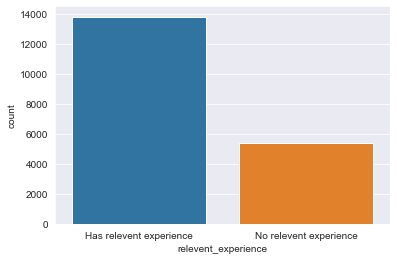

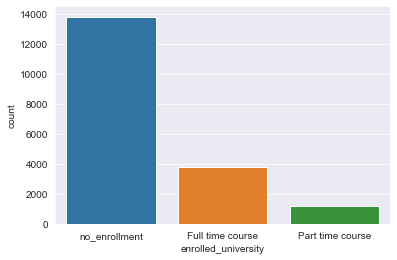

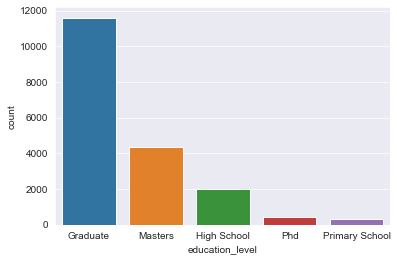

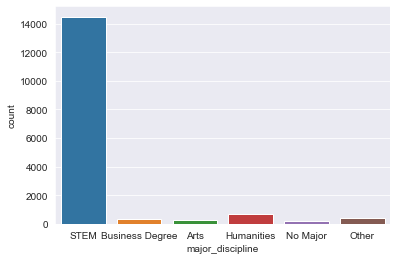

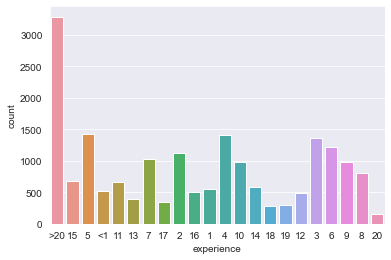

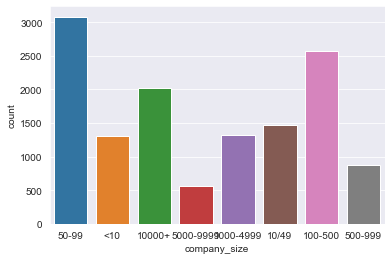

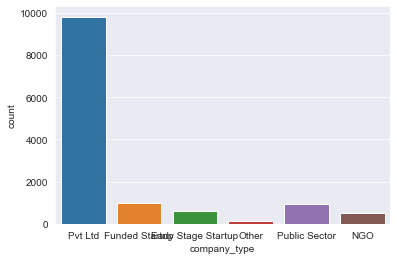

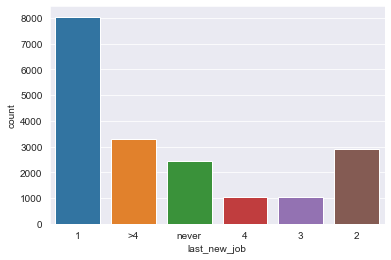

In [18]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=22:
        sns.countplot(df[col])
        plt.show()

### 8. Segment the target by numeric features

In [19]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [20]:
df['experience']=df['experience'].replace({'>20':21,'<1':0}).astype(float)
df['last_new_job']=df['last_new_job'].replace({'>4':5,'never':0}).astype(float)

In [21]:
num_cols=['city_development_index','training_hours','experience','last_new_job']

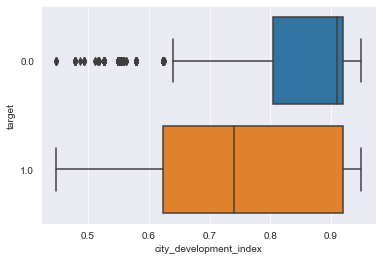

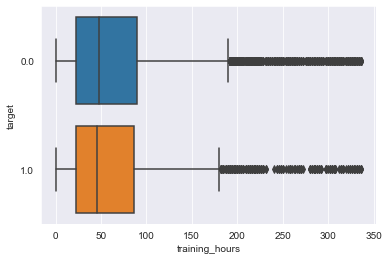

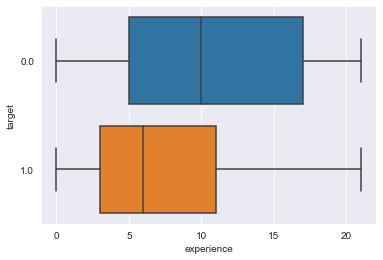

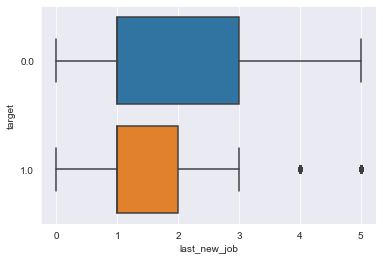

In [25]:
for col in num_cols:
    sns.boxplot(x=col,y=df['target'].astype('category'),data=df)
    plt.show()

We can see that training_hours are equally distributed among those who stayed(target 0) and those who left (target 1). This means that training_hours might not be a good predictor for the target. However, we see that when it comes to experience and last_new_job, a bigger proportion of those who stayed are tending towards more years of experience and these could be good predictors.

### 9. Tabulate Target across various categorical features using cross tab

In [29]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique()<=4:
        display(pd.crosstab(df['target'],df[col],normalize='index'))


gender,Female,Male,Other
target,,,
0.0,0.080980,0.90650,0.012520
1.0,0.096222,0.88902,0.014758


relevent_experience,Has relevent experience,No relevent experience
target,,
0.0,0.753147,0.246853
1.0,0.619845,0.380155


enrolled_university,Full time course,Part time course,no_enrollment
target,,,
0.0,0.164754,0.063465,0.771781
1.0,0.307477,0.064890,0.627632


### 10.Count plot of target across various categorical features

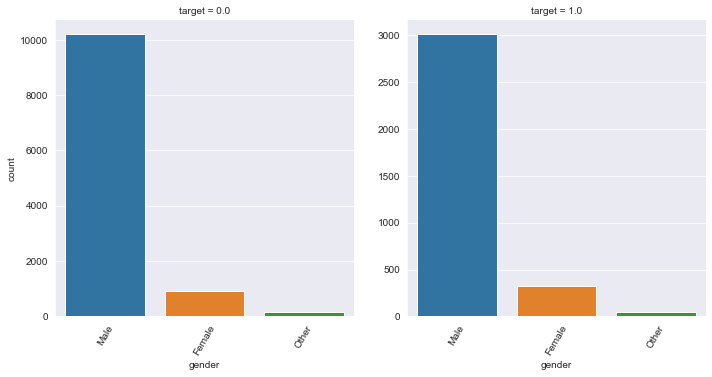

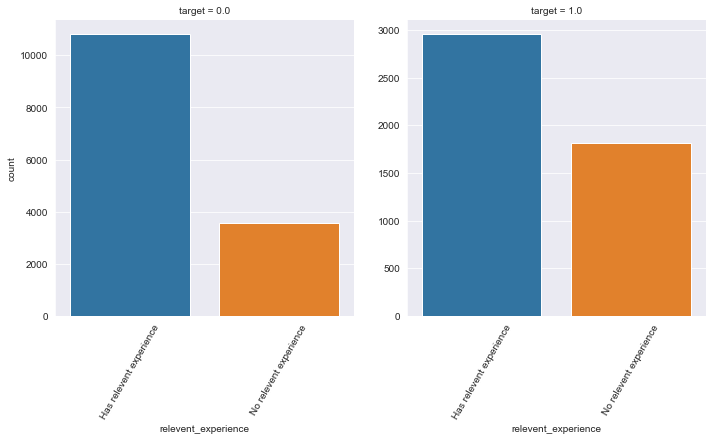

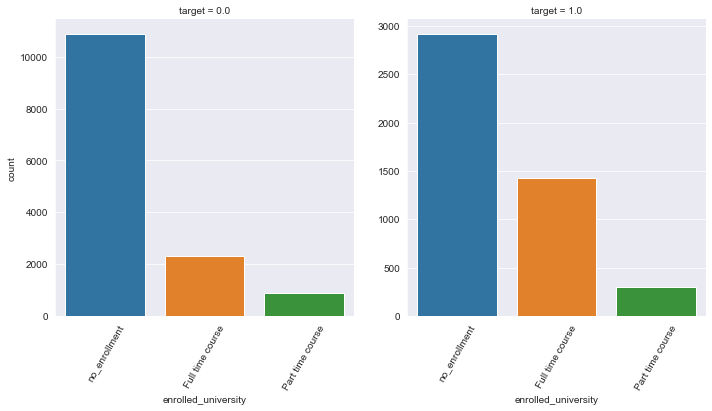

In [31]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <=4:
        g=sns.catplot(x=col,kind='count',col='target',data=df,sharey=False)
        g.set_xticklabels(rotation=60)

We can see that the gender classes do not change much depending on the target, but there is a significant difference in how the target feature is distributed among relevant_experience and enrolled_university . We see a bigger proportion of those without relevant experience leaving their jobs. We also see more of those enrolled in a full-time course leaving. This shows that these two features are good predictors of the target.

### 11. Group Numerical features with categorical features

In [32]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique()<=3:
        display(df.groupby(col)[['city_development_index','training_hours','experience','last_new_job']].mean())

,city_development_index,training_hours,experience,last_new_job
gender,,,,
Female,0.844740,65.636511,9.154406,1.947240
Male,0.839053,65.297633,10.863124,2.096328
Other,0.866272,63.869110,9.079787,1.780105


,city_development_index,training_hours,experience,last_new_job
relevent_experience,,,,
Has relevent experience,0.83345,65.800174,11.537605,2.255435
No relevent experience,0.81702,64.253261,6.402806,1.330623


,city_development_index,training_hours,experience,last_new_job
enrolled_university,,,,
Full time course,0.788633,64.532340,5.763447,1.209134
Part time course,0.819777,67.571786,7.980785,1.836332
no_enrollment,0.842107,65.362018,11.548483,2.242733


### 12. Correlation Matrix for numeric features

In [33]:
corr=df.corr()
corr

,enrollee_id,city_development_index,experience,last_new_job,training_hours,target
enrollee_id,1.000000,-0.040455,-0.035509,-0.030693,0.000998,0.049475
city_development_index,-0.040455,1.000000,0.333967,0.188984,0.001920,-0.341665
experience,-0.035509,0.333967,1.000000,0.479033,0.000908,-0.176724
last_new_job,-0.030693,0.188984,0.479033,1.000000,-0.006276,-0.082607
training_hours,0.000998,0.001920,0.000908,-0.006276,1.000000,-0.021577
target,0.049475,-0.341665,-0.176724,-0.082607,-0.021577,1.000000


### 13. Heatmap

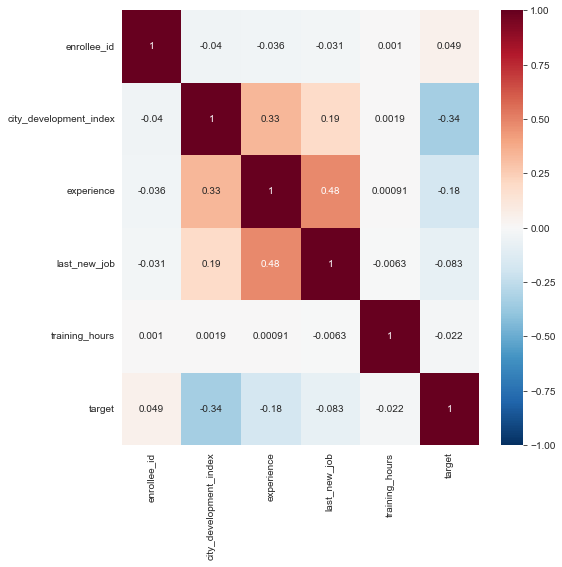

In [35]:
plt.figure(figsize=(8,8))
sns.heatmap(corr,cmap='RdBu_r',annot=True,vmax=1,vmin=-1)
plt.show()

We see that experience and last_new_job have a somewhat strong positive correlation. We also see a slightly weak negative relationship between the target and city_development_index

In [ ]:
#end